# VWAP - Tick Forecast

# Model Optimization

## Experiment Setting

Due to limited calculation resources, we fix the max_behind parameter and the tick_window parameter for the model performance optimization.

In [5]:
# max_behind = 2000
# tick_window = 20
# round_lot = 100
# order_quantity = 300000

For more summary about the model optimization methodology, please refer to "hw2_report.doc".

## Pick the best Schedule Factor Coefficient

In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

# load our helper functios
import simtools as st
import vwap2_limit_revised as vw

matplotlib.rcParams[ 'figure.figsize' ] = ( 16, 9 )

In [2]:
vwap_coefs = [ 9.95503275e-03, -1.01533564e-04,  5.73879785e-07, -1.47027197e-09, 1.38993793e-12]

In [3]:
# set up some variables
tickfile = 'TSLA-TAQ-jan20.zip'
taq = pd.read_pickle(tickfile)

def filter(df):
    return df[(pd.isna(df.trade_px) == 0) |((pd.isna(df.trade_px) == 1) & ( df.qu_source == 'N') & (df.natbbo_ind == 4 ))]

day1 = taq['2020-01-15']
day1 = filter(day1)
day2 = taq['2020-01-16']
day2 = filter(day2)
day3 = taq['2020-01-17']
day3 = filter(day3)

### Sell

In [4]:
schedule_coefs = np.linspace(-1, 1, 10)
avg_slipperage = []
order_quantity = 300000
order_side = 's'

for i, schedule_coef in enumerate(schedule_coefs):
    results1 = vw.algo_loop(day1, order_side, order_quantity, vwap_coefs, schedule_coef)
    results2 = vw.algo_loop(day2, order_side, order_quantity, vwap_coefs, schedule_coef)
    results3 = vw.algo_loop(day3, order_side, order_quantity, vwap_coefs, schedule_coef)      
    
    slippage1 = results1['day_vwap'] - results1['avg_price']
    slippage2 = results2['day_vwap'] - results2['avg_price']
    slippage3 = results3['day_vwap'] - results3['avg_price']
    print("slipages", slippage1, slippage2, slippage3)
    print("If sell, then slippage smaller better")
    print("If buy, then slippage larger better")
    
    avg_slipperage.append((slippage1 + slippage2 + slippage3)/3)

if order_side == 's':   
    best_schedule_coef = schedule_coefs[np.argmin(avg_slipperage)]
else:
    best_schedule_coef = schedule_coefs_s[np.argmax(avg_slipperage)]

2020-03-27 20:19:12:814402: Beginning VWAP run: s 300000 shares
2020-03-27 20:19:12:814533: schedule_coef: -1.0, tick_coef: 0
Average stock spread for sample: 0.2682
2020-03-27 20:19:12:938041: starting main loop
2020-03-27 20:20:35:597690: end simulation loop
2020-03-27 20:20:35:597813: order analytics
2020-03-27 20:20:35:635396: Quantity Remaining: 0
2020-03-27 20:20:35:635486: VWAP run complete.
2020-03-27 20:20:35:662306: Beginning VWAP run: s 300000 shares
2020-03-27 20:20:35:662405: schedule_coef: -1.0, tick_coef: 0
Average stock spread for sample: 0.2473
2020-03-27 20:20:35:729364: starting main loop
2020-03-27 20:22:19:698451: end simulation loop
2020-03-27 20:22:19:698553: order analytics
2020-03-27 20:22:19:738054: Quantity Remaining: 0
2020-03-27 20:22:19:738181: VWAP run complete.
2020-03-27 20:22:19:768124: Beginning VWAP run: s 300000 shares
2020-03-27 20:22:19:768218: schedule_coef: -1.0, tick_coef: 0
Average stock spread for sample: 0.2104
2020-03-27 20:22:19:810086: st

2020-03-27 20:49:24:259619: end simulation loop
2020-03-27 20:49:24:259719: order analytics
2020-03-27 20:49:24:293451: Quantity Remaining: 0
2020-03-27 20:49:24:293542: VWAP run complete.
2020-03-27 20:49:24:320505: Beginning VWAP run: s 300000 shares
2020-03-27 20:49:24:320610: schedule_coef: 0.33333333333333326, tick_coef: 0
Average stock spread for sample: 0.2473
2020-03-27 20:49:24:387746: starting main loop
2020-03-27 20:51:37:106236: end simulation loop
2020-03-27 20:51:37:106345: order analytics
2020-03-27 20:51:37:143299: Quantity Remaining: 0
2020-03-27 20:51:37:143382: VWAP run complete.
2020-03-27 20:51:37:177544: Beginning VWAP run: s 300000 shares
2020-03-27 20:51:37:177799: schedule_coef: 0.33333333333333326, tick_coef: 0
Average stock spread for sample: 0.2104
2020-03-27 20:51:37:222124: starting main loop
2020-03-27 20:52:53:538035: end simulation loop
2020-03-27 20:52:53:538153: order analytics
2020-03-27 20:52:53:561956: Quantity Remaining: 0
2020-03-27 20:52:53:5620

In [5]:
pickle.dump(schedule_coefs, open("schudule_coefs_s.p", "wb" ))
pickle.dump(avg_slipperage, open("schudule_coefs_avg_slipperage_s.p", "wb" ))
pickle.dump(best_schedule_coef, open("schudule_coefs_s_best.p", "wb" ))
print(best_schedule_coef)

-0.5555555555555556


With tick_coef = 0:
best_schedule_coef:  -0.5555555555555556


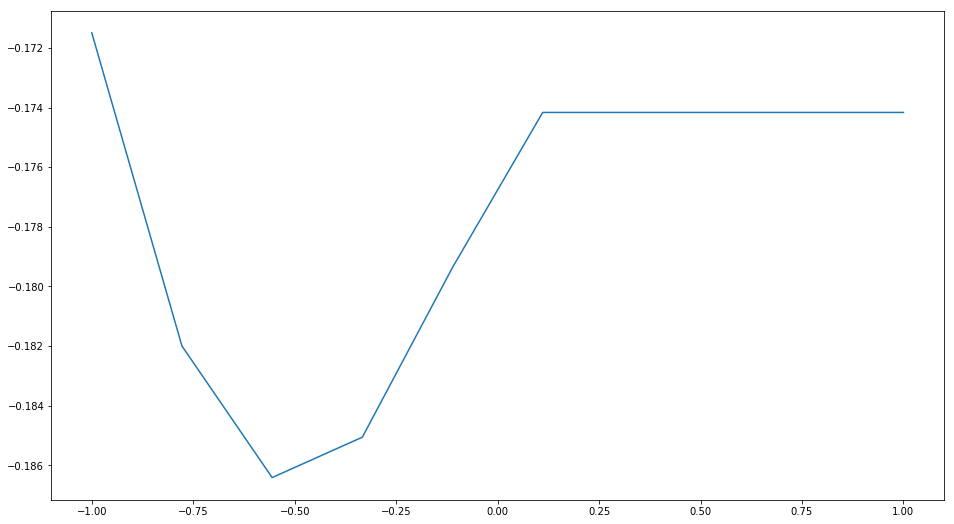

In [10]:
file = open("schudule_coefs_avg_slipperage_s.p",'rb')
avg_slipperage = pickle.load(file)
file.close()

file = open("schudule_coefs_s.p",'rb')
schedule_coefs = pickle.load(file)
file.close()

file = open("schudule_coefs_s_best.p",'rb')
best_schedule_coef = pickle.load(file)
file.close()

plt.plot(schedule_coefs, avg_slipperage)

print("With tick_coef = 0:")
print("best_schedule_coef: ", best_schedule_coef)

### Buy

In [6]:
schedule_coefs = np.linspace(-1, 1, 10)
avg_slipperage = []
order_quantity = 300000
order_side = 'b'


for i, schedule_coef in enumerate(schedule_coefs):
    results1 = vw.algo_loop(day1, order_side, order_quantity, vwap_coefs, schedule_coef)
    results2 = vw.algo_loop(day2, order_side, order_quantity, vwap_coefs, schedule_coef)
    results3 = vw.algo_loop(day3, order_side, order_quantity, vwap_coefs, schedule_coef)     
    
    slippage1 = results1['day_vwap'] - results1['avg_price']
    slippage2 = results2['day_vwap'] - results2['avg_price']
    slippage3 = results3['day_vwap'] - results3['avg_price']
    print("slipages", slippage1, slippage2, slippage3)
    print("If sell, then slippage smaller better")
    print("If buy, then slippage larger better")
    
    avg_slipperage.append((slippage1 + slippage2 + slippage3)/3)

if order_side == 's':   
    best_schedule_coef = schedule_coefs[np.argmin(avg_slipperage)]
else:
    best_schedule_coef = schedule_coefs[np.argmax(avg_slipperage)]

2020-03-27 21:08:35:240394: Beginning VWAP run: b 300000 shares
2020-03-27 21:08:35:240545: schedule_coef: -1.0, tick_coef: 0
Average stock spread for sample: 0.2682
2020-03-27 21:08:35:298180: starting main loop
2020-03-27 21:10:13:092299: end simulation loop
2020-03-27 21:10:13:092398: order analytics
2020-03-27 21:10:13:126304: Quantity Remaining: 0
2020-03-27 21:10:13:126398: VWAP run complete.
2020-03-27 21:10:13:153119: Beginning VWAP run: b 300000 shares
2020-03-27 21:10:13:153379: schedule_coef: -1.0, tick_coef: 0
Average stock spread for sample: 0.2473
2020-03-27 21:10:13:219684: starting main loop
2020-03-27 21:12:24:572342: end simulation loop
2020-03-27 21:12:24:572438: order analytics
2020-03-27 21:12:24:609399: Quantity Remaining: 0
2020-03-27 21:12:24:609486: VWAP run complete.
2020-03-27 21:12:24:644087: Beginning VWAP run: b 300000 shares
2020-03-27 21:12:24:644314: schedule_coef: -1.0, tick_coef: 0
Average stock spread for sample: 0.2104
2020-03-27 21:12:24:687107: st

2020-03-27 21:40:30:521884: end simulation loop
2020-03-27 21:40:30:521984: order analytics
2020-03-27 21:40:30:555111: Quantity Remaining: 0
2020-03-27 21:40:30:555194: VWAP run complete.
2020-03-27 21:40:30:587588: Beginning VWAP run: b 300000 shares
2020-03-27 21:40:30:587854: schedule_coef: 0.33333333333333326, tick_coef: 0
Average stock spread for sample: 0.2473
2020-03-27 21:40:30:656112: starting main loop
2020-03-27 21:42:26:381257: end simulation loop
2020-03-27 21:42:26:381381: order analytics
2020-03-27 21:42:26:422167: Quantity Remaining: 0
2020-03-27 21:42:26:422256: VWAP run complete.
2020-03-27 21:42:26:458358: Beginning VWAP run: b 300000 shares
2020-03-27 21:42:26:458474: schedule_coef: 0.33333333333333326, tick_coef: 0
Average stock spread for sample: 0.2104
2020-03-27 21:42:26:501099: starting main loop
2020-03-27 21:43:55:663323: end simulation loop
2020-03-27 21:43:55:663427: order analytics
2020-03-27 21:43:55:688956: Quantity Remaining: 0
2020-03-27 21:43:55:6890

In [7]:
pickle.dump(schedule_coefs, open("schudule_coefs_b.p", "wb" ))
pickle.dump(avg_slipperage, open("schudule_coefs_avg_slipperage_b.p", "wb" ))
print(best_schedule_coef)
pickle.dump(best_schedule_coef, open("schudule_coefs_b_best.p", "wb" ))

1.0


With tick_coef = 0:
best_schedule_coef:  1.0


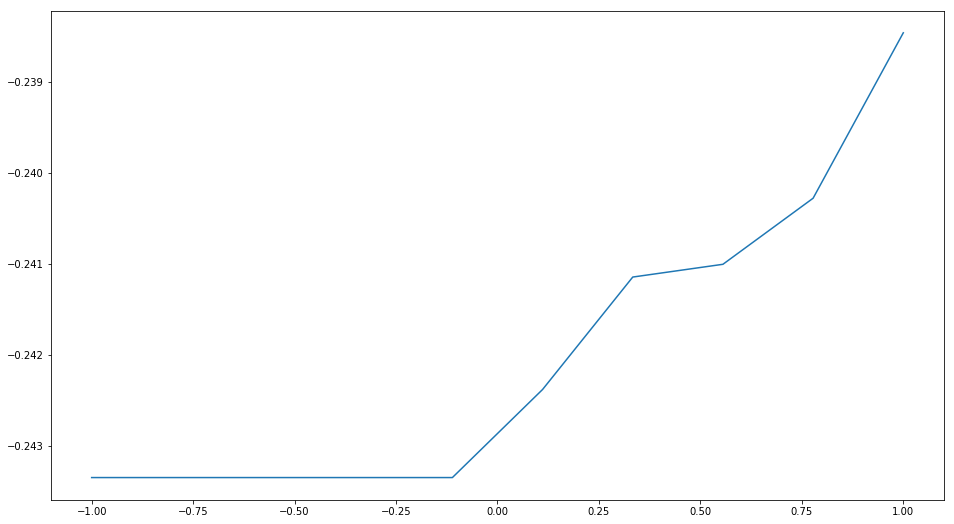

In [11]:
file = open("schudule_coefs_avg_slipperage_b.p",'rb')
avg_slipperage = pickle.load(file)
file.close()

file = open("schudule_coefs_b.p",'rb')
schedule_coefs = pickle.load(file)
file.close()

file = open("schudule_coefs_b_best.p",'rb')
best_schedule_coef = pickle.load(file)
file.close()

plt.plot(schedule_coefs, avg_slipperage)

print("With tick_coef = 0:")
print("best_schedule_coef: ", best_schedule_coef)

## Pick the best Tick Factor Coefficient

### Sell

In [9]:
avg_slipperage = []
tick_coefs = np.linspace(-1, 1, 10)
order_quantity = 300000
order_side = 's'

file = open("schudule_coefs_s_best.p",'rb')
best_schedule_coef = pickle.load(file)
file.close()


for i, tick_coef in enumerate(tick_coefs):
    results1 = vw.algo_loop(day1, order_side, order_quantity, vwap_coefs, best_schedule_coef, tick_coef)
    results2 = vw.algo_loop(day2, order_side, order_quantity, vwap_coefs, best_schedule_coef, tick_coef)
    results3 = vw.algo_loop(day3, order_side, order_quantity, vwap_coefs, best_schedule_coef, tick_coef)
    
    slippage1 = results1['day_vwap'] - results1['avg_price']
    slippage2 = results2['day_vwap'] - results2['avg_price']
    slippage3 = results3['day_vwap'] - results3['avg_price']
    print("slipages", slippage1, slippage2, slippage3)
    print("If sell, then slippage smaller better")
    print("If buy, then slippage larger better")
    
    avg_slipperage.append((slippage1 + slippage2 + slippage3)/3)

if order_side == 's':   
    best_tick_coef = tick_coefs[np.argmin(avg_slipperage)]
else:
    best_tick_coef = ticke_coefs[np.argmax(avg_slipperage)]

2020-03-27 22:03:07:829963: Beginning VWAP run: s 300000 shares
2020-03-27 22:03:07:830102: schedule_coef: -0.5555555555555556, tick_coef: -1.0
Average stock spread for sample: 0.2682
2020-03-27 22:03:07:889186: starting main loop
2020-03-27 22:04:41:968912: end simulation loop
2020-03-27 22:04:41:969015: order analytics
2020-03-27 22:04:42:001473: Quantity Remaining: 0
2020-03-27 22:04:42:001557: VWAP run complete.
2020-03-27 22:04:42:031422: Beginning VWAP run: s 300000 shares
2020-03-27 22:04:42:031535: schedule_coef: -0.5555555555555556, tick_coef: -1.0
Average stock spread for sample: 0.2473
2020-03-27 22:04:42:095791: starting main loop
2020-03-27 22:06:28:443653: end simulation loop
2020-03-27 22:06:28:443752: order analytics
2020-03-27 22:06:28:481995: Quantity Remaining: 0
2020-03-27 22:06:28:482082: VWAP run complete.
2020-03-27 22:06:28:516559: Beginning VWAP run: s 300000 shares
2020-03-27 22:06:28:516746: schedule_coef: -0.5555555555555556, tick_coef: -1.0
Average stock sp

2020-03-27 22:30:48:261075: end simulation loop
2020-03-27 22:30:48:261216: order analytics
2020-03-27 22:30:48:284394: Quantity Remaining: 0
2020-03-27 22:30:48:284494: VWAP run complete.
slipages -0.7273857718485033 -0.011235504177022904 0.17826564718023974
If sell, then slippage smaller better
If buy, then slippage larger better
2020-03-27 22:30:48:305446: Beginning VWAP run: s 300000 shares
2020-03-27 22:30:48:305537: schedule_coef: -0.5555555555555556, tick_coef: 0.33333333333333326
Average stock spread for sample: 0.2682
2020-03-27 22:30:48:359970: starting main loop
2020-03-27 22:32:18:494176: end simulation loop
2020-03-27 22:32:18:494273: order analytics
2020-03-27 22:32:18:527960: Quantity Remaining: 0
2020-03-27 22:32:18:528049: VWAP run complete.
2020-03-27 22:32:18:558513: Beginning VWAP run: s 300000 shares
2020-03-27 22:32:18:558712: schedule_coef: -0.5555555555555556, tick_coef: 0.33333333333333326
Average stock spread for sample: 0.2473
2020-03-27 22:32:18:625693: star

In [10]:
pickle.dump(schedule_coefs, open("tick_coefs_s.p", "wb" ))
pickle.dump(avg_slipperage, open("tick_coefs_avg_slipperage_s.p", "wb" ))
print(best_tick_coef)
pickle.dump(best_tick_coef, open("tick_coefs_s_best.p", "wb" ))

1.0


With best_schedule_coef = -0.5555555555555556:
best tick_coef:  1.0


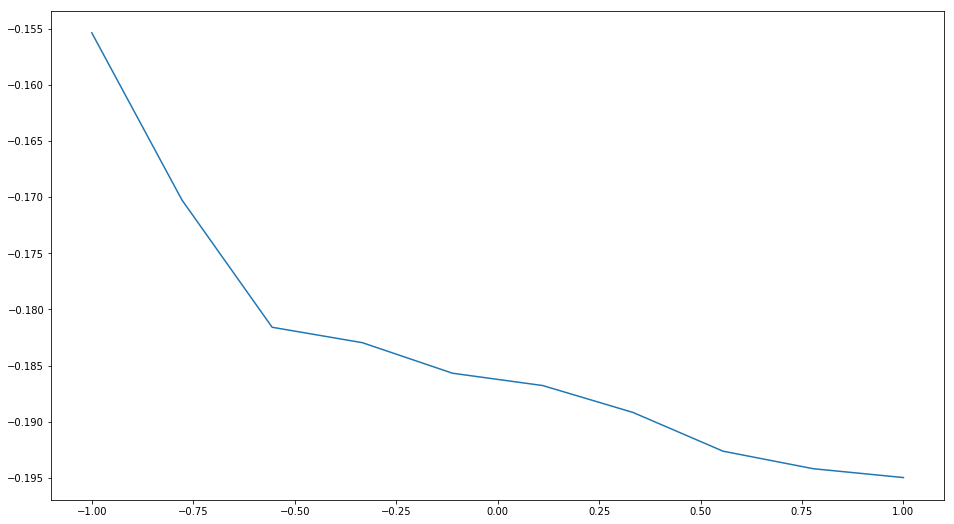

In [13]:
file = open("tick_coefs_avg_slipperage_s.p",'rb')
avg_slipperage = pickle.load(file)
file.close()

file = open("tick_coefs_s.p",'rb')
tick_coefs = pickle.load(file)
file.close()

file = open("tick_coefs_s_best.p",'rb')
best_tick_coef = pickle.load(file)
file.close()

file = open("schudule_coefs_s_best.p",'rb')
best_schedule_coef = pickle.load(file)
file.close()

plt.plot(tick_coefs, avg_slipperage)

print("With best_schedule_coef = {}:".format(best_schedule_coef))
print("best tick_coef: ", best_tick_coef)



### Buy

In [11]:
avg_slipperage = []
tick_coefs = np.linspace(-1, 1, 10)
order_quantity = 300000
order_side = 'b'

file = open("schudule_coefs_b_best.p",'rb')
best_schedule_coef = pickle.load(file)
file.close()


for i, tick_coef in enumerate(tick_coefs):
    results1 = vw.algo_loop(day1, order_side, order_quantity, vwap_coefs, best_schedule_coef, tick_coef)
    results2 = vw.algo_loop(day2, order_side, order_quantity, vwap_coefs, best_schedule_coef, tick_coef)
    results3 = vw.algo_loop(day3, order_side, order_quantity, vwap_coefs, best_schedule_coef, tick_coef)
    
    slippage1 = results1['day_vwap'] - results1['avg_price']
    slippage2 = results2['day_vwap'] - results2['avg_price']
    slippage3 = results3['day_vwap'] - results3['avg_price']
    print("slipages", slippage1, slippage2, slippage3)
    print("If sell, then slippage smaller better")
    print("If buy, then slippage larger better")
    
    avg_slipperage.append((slippage1 + slippage2 + slippage3)/3)

if order_side == 's':   
    best_tick_coef = tick_coefs[np.argmin(avg_slipperage)]
else:
    best_tick_coef = tick_coefs[np.argmax(avg_slipperage)]

2020-03-27 22:47:16:715990: Beginning VWAP run: b 300000 shares
2020-03-27 22:47:16:716110: schedule_coef: 1.0, tick_coef: -1.0
Average stock spread for sample: 0.2682
2020-03-27 22:47:16:770856: starting main loop
2020-03-27 22:48:35:231514: end simulation loop
2020-03-27 22:48:35:231619: order analytics
2020-03-27 22:48:35:262395: Quantity Remaining: 0
2020-03-27 22:48:35:262479: VWAP run complete.
2020-03-27 22:48:35:292932: Beginning VWAP run: b 300000 shares
2020-03-27 22:48:35:293052: schedule_coef: 1.0, tick_coef: -1.0
Average stock spread for sample: 0.2473
2020-03-27 22:48:35:362745: starting main loop
2020-03-27 22:50:11:677983: end simulation loop
2020-03-27 22:50:11:678084: order analytics
2020-03-27 22:50:11:715232: Quantity Remaining: 0
2020-03-27 22:50:11:715332: VWAP run complete.
2020-03-27 22:50:11:748022: Beginning VWAP run: b 300000 shares
2020-03-27 22:50:11:748204: schedule_coef: 1.0, tick_coef: -1.0
Average stock spread for sample: 0.2104
2020-03-27 22:50:11:7888

2020-03-27 23:14:35:116146: end simulation loop
2020-03-27 23:14:35:116250: order analytics
2020-03-27 23:14:35:148465: Quantity Remaining: 0
2020-03-27 23:14:35:148555: VWAP run complete.
2020-03-27 23:14:35:180285: Beginning VWAP run: b 300000 shares
2020-03-27 23:14:35:180588: schedule_coef: 1.0, tick_coef: 0.33333333333333326
Average stock spread for sample: 0.2473
2020-03-27 23:14:35:250021: starting main loop
2020-03-27 23:16:25:363986: end simulation loop
2020-03-27 23:16:25:364087: order analytics
2020-03-27 23:16:25:402257: Quantity Remaining: 0
2020-03-27 23:16:25:402349: VWAP run complete.
2020-03-27 23:16:25:437268: Beginning VWAP run: b 300000 shares
2020-03-27 23:16:25:437526: schedule_coef: 1.0, tick_coef: 0.33333333333333326
Average stock spread for sample: 0.2104
2020-03-27 23:16:25:481507: starting main loop
2020-03-27 23:17:31:034328: end simulation loop
2020-03-27 23:17:31:034435: order analytics
2020-03-27 23:17:31:058796: Quantity Remaining: 0
2020-03-27 23:17:31:

In [12]:
pickle.dump(schedule_coefs, open("tick_coefs_b.p", "wb" ))
pickle.dump(avg_slipperage, open("tick_coefs_avg_slipperage_b.p", "wb" ))
print(best_tick_coef)
pickle.dump(best_tick_coef, open("tick_coefs_b_best.p", "wb" ))

1.0


With best_schedule_coef = 1.0:
best tick_coef:  1.0


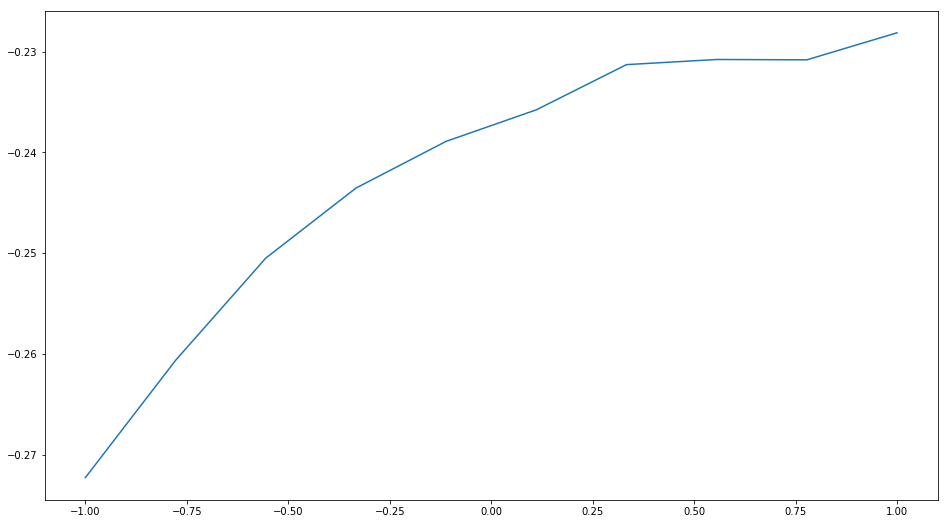

In [14]:
file = open("tick_coefs_avg_slipperage_b.p",'rb')
avg_slipperage = pickle.load(file)
file.close()

file = open("tick_coefs_b.p",'rb')
tick_coefs = pickle.load(file)
file.close()

file = open("tick_coefs_b_best.p",'rb')
best_tick_coef = pickle.load(file)
file.close()

file = open("schudule_coefs_b_best.p",'rb')
best_schedule_coef = pickle.load(file)
file.close()

plt.plot(tick_coefs, avg_slipperage)

print("With best_schedule_coef = {}:".format(best_schedule_coef))
print("best tick_coef: ", best_tick_coef)